# End-Semester Exam

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import lib_for_endsem as lib

## Question 2

### Helper Functions

In [11]:
def legendre_poly(x, order):
    if order == 0: return 1
    elif order == 1: return x
    elif order == 2: return (3*(x**2) - 1) / 2
    elif order == 3: return (5*(x**3) - 3*x) / 2
    elif order == 4: return (35*(x**4) - 30*(x**2) + 3) / 8
    elif order == 5: return (63*(x**5) - 70*(x**3) + 15*x) / 8
    elif order == 6: return (231*(x**6) - 315*(x**4) + 105*(x**2) - 5) / 16





def legendre_fit(X, Y, d = 3):
    n = len(X)
    p = d + 1
    A = np.zeros((p, p))
    b = np.zeros(p)

    for i in range(p):
        for j in range(p):
            sum = 0
            for k in range(n):
                sum += legendre_poly(X[k], j) * legendre_poly(X[k], i)
            A[i, j] = sum

    for i in range(p):
        sum = 0
        for k in range(n):
            sum += legendre_poly(X[k], i) * Y[k]
        b[i] = sum

    x = lib.solvex_lu(A, b)
    return x

### Main Code

The coefficients obtained in the legendre functions basis is : [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697
 -0.01238456]


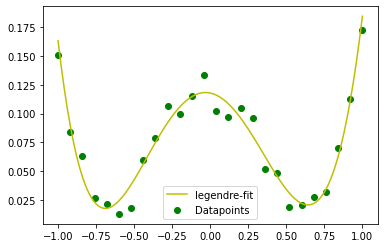

In [12]:
f = open('esem4fit.txt', 'r')
data = np.genfromtxt(f, delimiter='')
f.close()

X = data.T[0]
Y = data.T[1]

order = 6

coeff = legendre_fit(X, Y, order)

c_0, c_1, c_2, c_3 = coeff[0], coeff[1], coeff[2], coeff[3]

print("The coefficients obtained in the legendre functions basis is : {}".format(coeff))

x = np.linspace(-1, 1, 100)
y = 0
for i in range(order):
    y += coeff[i] * legendre_poly(x , i)

plt.scatter(X, Y, c = 'g', label="Datapoints")
plt.plot(x, y, "y", label="legendre-fit")

plt.legend()
plt.show()

## Question 4

### Helper functions

In [39]:
def Legendre(n,x):
	x=np.array(x)
	if (n==0):
		return x*0+1.0
	elif (n==1):
		return x
	else:
		return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n
 
##################################################################
# Derivative of the Legendre polynomials
def DLegendre(n,x):
	x=np.array(x)
	if (n==0):
		return x*0
	elif (n==1):
		return x*0+1.0
	else:
		return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))
##################################################################
# Roots of the polynomial obtained using Newton-Raphson method
def LegendreRoots(polyorder,tolerance=1e-20):
        if polyorder<2:
            err=1 # bad polyorder no roots can be found
        else : 
            roots=[]
            # The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
            for i in range(1,int(polyorder/2) +1):
                x = np.cos(np.pi*(i-0.25)/(polyorder+0.5))
                error=10*tolerance
                iters=0
                while (error>tolerance) and (iters<1000):
                    dx=-Legendre(polyorder,x)/DLegendre(polyorder,x)
                    x=x+dx
                    iters=iters+1
                    error=abs(dx)
                roots.append(x)
            # Use symmetry to get the other roots
            roots=np.asarray(roots)
            if polyorder%2==0:
                roots=np.concatenate( (-1.0*roots, roots[::-1]) )
            else:
                roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )
            err=0 # successfully determined roots
        return [roots, err]
##################################################################
# Weight coefficients
def GaussLegendreWeights(polyorder):
	W=[]
	[xis,err]=LegendreRoots(polyorder)
	if err==0:
		W=2.0/( (1.0-xis**2)*(DLegendre(polyorder,xis)**2) )
		err=0
	else:
		err=1 # could not determine roots - so no weights
	return [np.round_(W, decimals=9), np.round_(xis, decimals=9), err]
##################################################################
# The integral value 
# func 		: the integrand
# a, b 		: lower and upper limits of the integral
# polyorder 	: order of the Legendre polynomial to be used
#
def GaussLegendreQuadrature(func, polyorder, a, b):
	[Ws,xs, err]= GaussLegendreWeights(polyorder)
	if err==0:
		ans=(b-a)*0.5*sum( Ws*func( (b-a)*0.5*xs+ (b+a)*0.5 ) )
	else: 
		# (in case of error)
		err=1
		ans=None
	return [ans,err]

def hand(degree):
	if degree ==4:
		zeros = [0.861136311,0.339981043,-0.861136311,-0.339981043]
		weights = [0.347854845]
		return

### Main Code

In [40]:
# The integrand - change as required
def func(x):
	return 1/np.sqrt(x**2 + 1)

for i in range(4,7):
    order = i
    [Ws,xs,err]=GaussLegendreWeights(order)
    if err==0:
        print("Order    : ", order)
        print("Roots    : ", xs)
        print("Weights  : ", Ws)
    else:
        print("Roots/Weights evaluation failed")
 
    # Integrating the function
    [ans,err]=GaussLegendreQuadrature(func , order, -1,1)
    if err==0:
        print( "Integral : ", ans)
    else:
        print("Integral evaluation failed")
print(xs[0])

Order    :  4
Roots    :  [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights  :  [0.34785485 0.65214515 0.65214515 0.34785485]
Integral :  1.7620541803713057
Order    :  5
Roots    :  [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights  :  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
Integral :  1.7628552960514048
Order    :  6
Roots    :  [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
Weights  :  [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]
Integral :  1.762730050077202
-0.932469514203152


## Question 1

### Helper Functions

In [14]:
def mlcg(x):
    num = (572*x)%16381
    return num

def rand_angles(N, seed):
    angles = np.zeros(N)
    for i in range(N):
        if i == 0:
            value = mlcg(seed)
        else:
            value = mlcg(value)
        angles[i] = value
    
    angles = (angles/16381)*2*np.pi        
    return angles

def walk(steps, seed):
    angles = rand_angles(steps, seed)
    pos = np.zeros((steps,2))
    for i in range(1,steps):
        pos[i,:] = pos[i-1,:] + [np.cos(angles[i]), np.sin(angles[i])]
    return pos

def rms(walk):
    return np.sqrt(np.mean([position[0]**2+position[1]**2 for position in walk]))

### Main Code

In [15]:
numwalks = 500
steps = 200
dimensions = 2

#simulate 500 random numwalks of 200 steps in 2 dimensions
strolls = np.zeros((numwalks, steps, dimensions))
for i in range(numwalks):
    #using i+1 as seed
    #to get different set of numwalks, use seed = f(i)
    #we took f(i) = i+1
    strolls[i,:,:] = walk(steps, i+1)

    
rmses = [rms(walk) for walk in strolls]
rms_final = np.mean(rmses)
print("RMS for 500 numwalks of 200 steps is: ", rms_final)
print("The value of square root N is: ",np.sqrt(steps))

RMS for 500 numwalks of 200 steps is:  9.140400837751091
The value of square root N is:  14.142135623730951


## Question 3

### Helper Functions

In [37]:
def heat_plotter(points, state, text):
    x = np.arange(0, 2.1, 0.1)
    y = np.zeros((points + 2))
    y[1:-1] = state
    plt.plot(x,y, label=text)

### Main Code

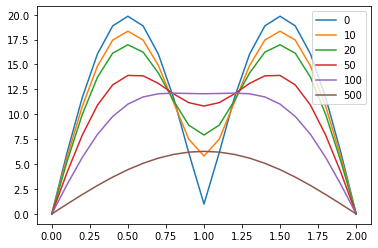

In [38]:
total_points = 20 + 1
points = total_points - 2
dx = 0.1
dt = 0.0008
a = dt/(dx**2)

init_state = np.zeros((points))
for i in range(points):
    init_state[i] = 20*abs(np.sin(np.pi*(i+1)*0.1))

A = np.zeros((points,points))
for i in range(points):
    A[i,i] = 1-(2*a)
    if i+1 < points:
        A[i+1,i] = a
        A[i,i+1] = a

watch = [0,10,20,50,100,500]
for i in range(501):
    if i == 0:
        state = init_state
    state = np.matmul(A,state)
    
    if i in watch:
        heat_plotter(points, state, str(i))
        
plt.legend()
plt.show()
    